In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

In [3]:
df = pd.read_csv('linkedin-reviews.csv')

In [4]:
df.head()

,Review,Rating
0,Does absolutely nothing for a LinkedIn beginne...,1
1,Force close(galaxy tab),1
2,Slow and it tries to upload your contacts with...,1
3,Add ability to customize the profile and move ...,4
4,"Good app, but it's a pain that it's not possib...",4


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  702 non-null    object
 1   Rating  702 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 11.1+ KB
None


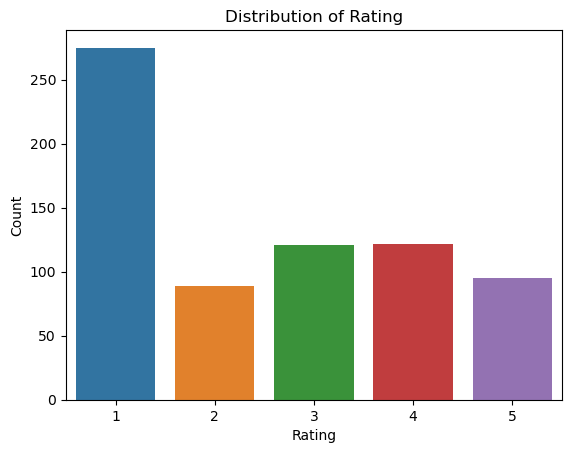

In [7]:
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Rating')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [8]:
df['Review length'] = df['Review'].apply(len)

df['Review length']

0       80
1       23
2       61
3       90
4      133
      ... 
697     53
698     72
699     81
700    123
701     80
Name: Review length, Length: 702, dtype: int64

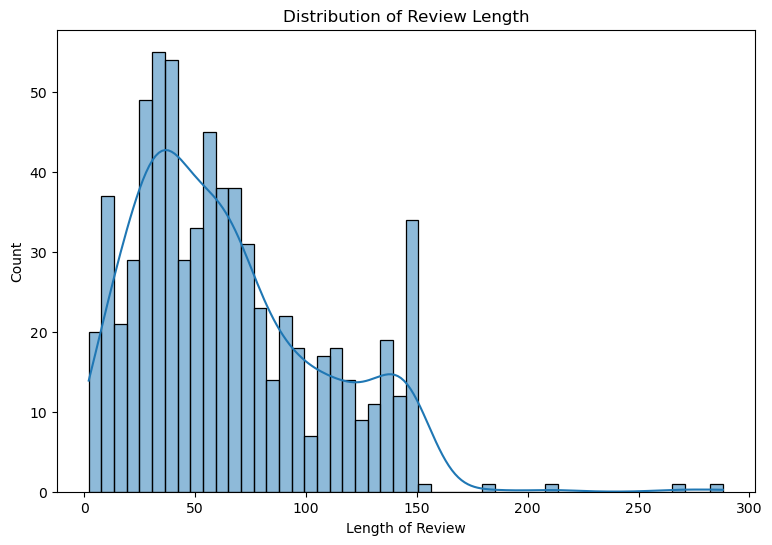

In [24]:
df['Review length'] = df['Review'].apply(len)

plt.figure(figsize=(9, 6))
sns.histplot(df['Review length'], bins=50, kde=True)
plt.title('Distribution of Review Length')
plt.xlabel('Length of Review')
plt.ylabel('Count')
plt.show()

In [32]:
def sentiment_analysis(review):
    sentiment = TextBlob(review).sentiment
    
    if sentiment.polarity > 0.1:
        return 'Positive'
    elif sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'
    
    
df['Sentiment'] = df['Review'].apply(sentiment_analysis)    

print(df['Sentiment'])

0      Negative
1       Neutral
2      Negative
3       Neutral
4      Positive
         ...   
697     Neutral
698    Positive
699    Positive
700     Neutral
701    Positive
Name: Sentiment, Length: 702, dtype: object


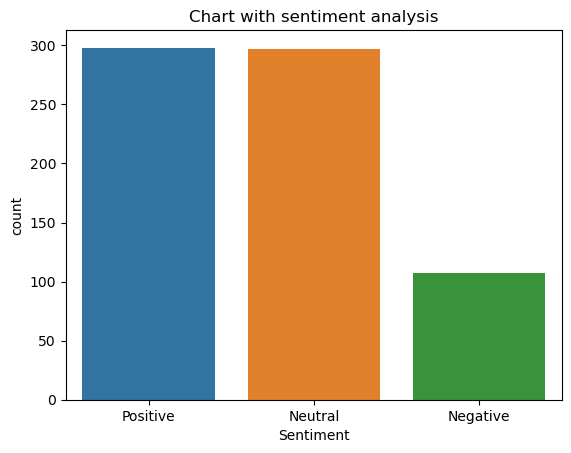

In [33]:
sentiment_distribution = df['Sentiment'].value_counts()

sns.barplot(x = sentiment_distribution.index, y = sentiment_distribution.values)
plt.title("Chart with sentiment analysis")
plt.xlabel("Sentiment")
plt.ylabel("count")
plt.show()

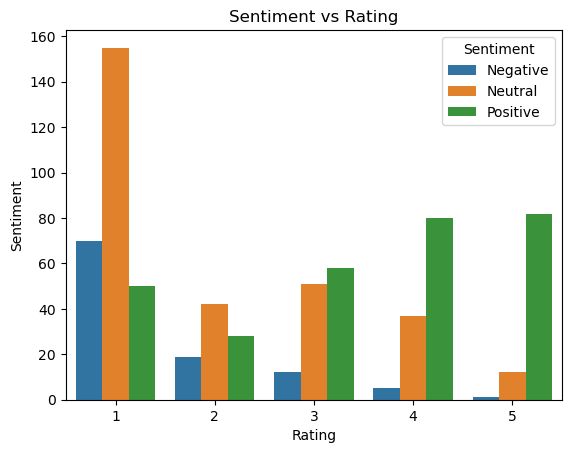

In [34]:
sns.countplot(df, x = 'Rating', hue = 'Sentiment')
plt.title('Sentiment vs Rating')
plt.xlabel('Rating')
plt.ylabel('Sentiment')
plt.legend(title = 'Sentiment')
plt.show()

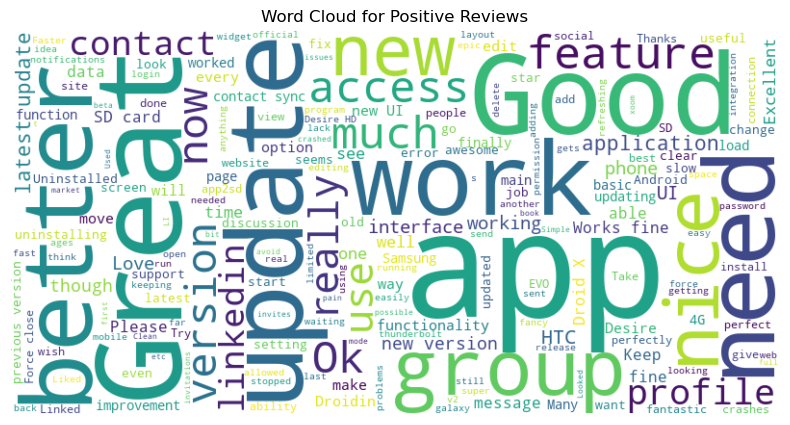

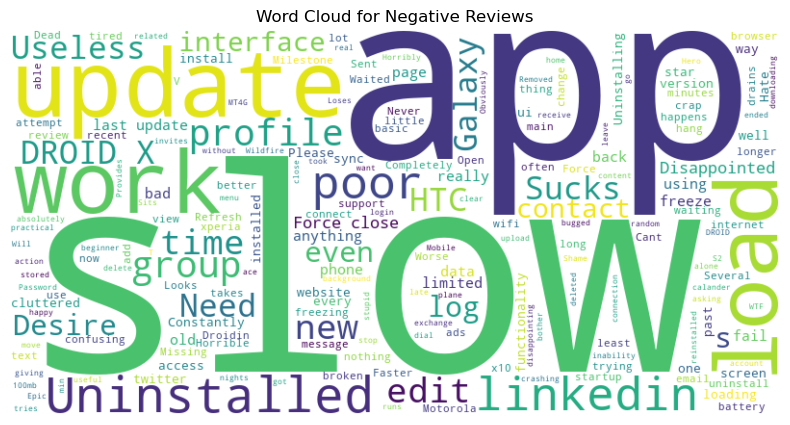

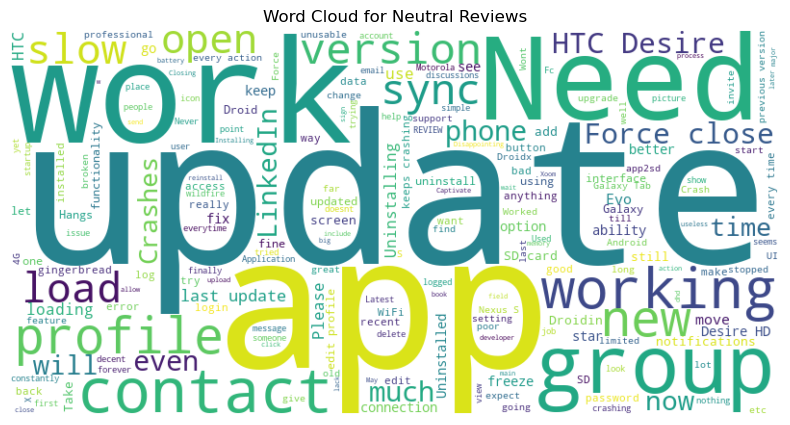

In [38]:
def generate_word_cloud(sentiment):
    text = ' '.join(review for review in df[df['Sentiment'] == sentiment]['Review'])
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Reviews')
    plt.axis('off')
    plt.show()
    
for sentiment in ['Positive', 'Negative', 'Neutral']:
    generate_word_cloud(sentiment)